In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from recepmod import StoneHelper
from recepmod import StoneModel
from recepmod.figures import Figure1
from recepmod.figures import Figure2
import seaborn as sns

M, dset = StoneHelper.read_chain("mcmc_chain.h5")

goodFits = dset[dset['LL'] > max(dset['LL'])-2]

p = dset.iloc[np.argmax(dset['LL']),:][2:].as_matrix()

print(np.max(dset['LL']))

-56.6696526677


In [ ]:
sns.pairplot(goodFits.iloc[:,8:])

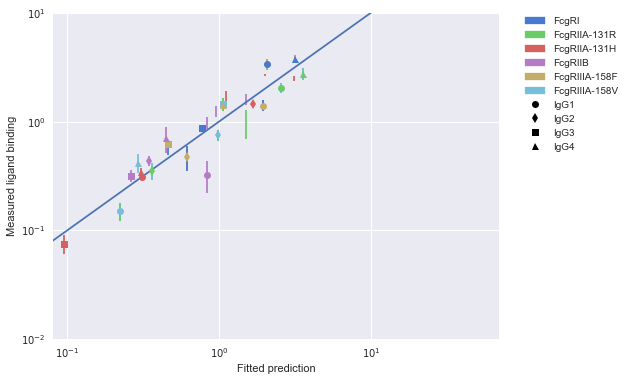

In [3]:
Figure2.plotFit(StoneHelper.getFitMeasMergedSummarized(M, p))

In [ ]:
Figure1.plotNormalizedBindingvsKA(StoneHelper.getFitMeasMergedSummarized(M, p))

In [ ]:
Figure2.plotQuant(StoneHelper.getFitMeasMergedSummarized(M, p), 'Meas_mean', 'nXlinkPred')

In [ ]:
#fitFrame.plot('Ka', 'LbndPred', 'scatter', loglog = True)

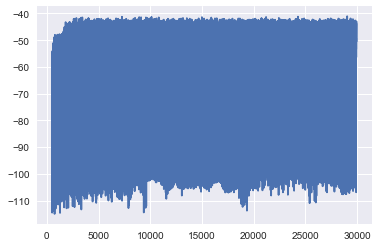

In [6]:
plt.plot(dset['LL'][500:])

In [ ]:
StoneHelper.mfiAdjMeanFigureMaker(M)

In [ ]:
StoneHelper.FcgRQuantificationFigureMaker(M)

# MCMC Histograms

In [ ]:
Rquant = StoneModel.StoneModel().Rquant

# Trim the burn in period
dset = dset.iloc[300::,:]

In [ ]:
print(dset.columns)

fig, axes = plt.subplots(nrows=3, ncols=2)
colors = sns.color_palette()

dset[['Kx1'     ]].plot.hist(ax=axes[0,0], bins = 100)
dset[['sigConv1', 'sigConv2']].plot.hist(ax=axes[0,1], bins = 100)
dset[['gnu1', 'gnu2'        ]].plot.hist(ax=axes[1,0], bins = 100)
dset[['sigma', 'sigma2'     ]].plot.hist(ax=axes[1,1], bins = 100)
for j in range(len(colors)):
    fcgr = Rquant[j]
    for meas in fcgr:
        axes[2,0].plot(np.repeat(meas,dset.shape[0]),np.arange(0,dset.shape[0]),color=colors[j])
dset[['Rexp'   ]].plot.hist(ax=axes[2,0], bins = 30,color=colors)
axes[2,0].set_ylim(0,12000)

plt.tight_layout()

In [ ]:
dset = dset.assign(sigDiff = lambda x: np.power(10, x.sigConv2 - x.sigConv1))
dset = dset.assign(gnuDiff = lambda x: x.gnu2 / x.gnu1)

fig, axes = plt.subplots(nrows=2, ncols=1)

dset['sigDiff'].plot.hist(ax=axes[0], bins = 100)
dset['gnuDiff'].plot.hist(ax=axes[1], bins = 20)

plt.tight_layout()